Question - Notebook for feature detector. For this I have done it in three ways, one is by just matching pixel intensities and the other by convolution and other by using open cv match template.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2 as cv

In [20]:
image = plt.imread('../characters.png')
image_gray = image[:,:,0]
template = plt.imread('../template.png')
template = template[:,:,0]

In [21]:
image_height = image_gray.shape[0]
image_width = image_gray.shape[1]
template_height = template.shape[0]
template_width = template.shape[1]

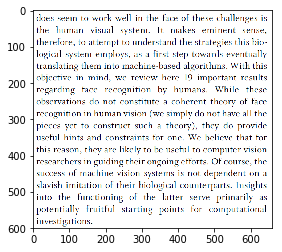

In [6]:
plt.imshow(image)
plt.show()

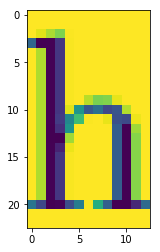

(23, 13)


In [7]:
plt.imshow(template)
plt.show()
print(template.shape)

In [8]:
def threshold(sub_img, template):
    equals = 0
    total = 0
    for i in range(0, template.shape[0]):
        for j in range(0, template.shape[1]):
            total += 1
            if sub_img[i,j] == template[i,j]:
                equals += 1
    return equals / float(total)

In [9]:
def detect_feature(image_gray, template, limit):
    fig, ax = plt.subplots(1)
    max_thresh = 0.0
    image_height = image_gray.shape[0]
    image_width = image_gray.shape[1]
    template_height = template.shape[0]
    template_width = template.shape[1]
    for i in range(0, (image_height - template_height)):

        for j in range(0, (image_width - template_width)):

            sub_img = image_gray[i:template_height+i, j:template_width+j]
            threshold_val = threshold(sub_img, template)
            if max_thresh < threshold_val:
                max_thresh = threshold_val
            if threshold_val > limit: #Adding a rectangle box
            #count += 1
                bottom_left_x = j
                bottom_left_y = i
                rectangle = patches.Rectangle((bottom_left_x,bottom_left_y), template_width, template_height, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rectangle)
    print(max_thresh)            
    ax.imshow(image)
    plt.show()

0.6521739130434783


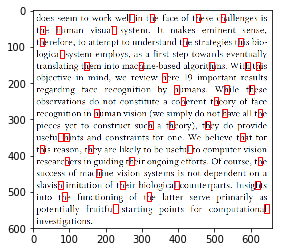

In [10]:
detect_feature(image_gray, template, 0.63)

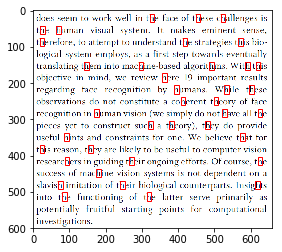

In [20]:
detect_feature(image_gray, template, 0.64)

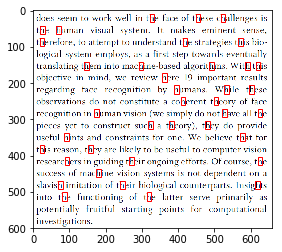

In [21]:
detect_feature(image_gray, template, 0.65)

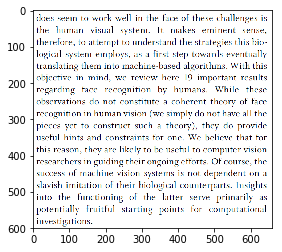

In [22]:
detect_feature(image_gray, template, 0.7)

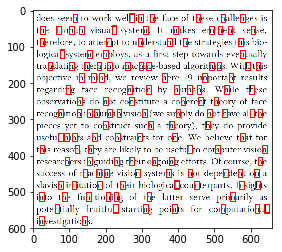

In [23]:
detect_feature(image_gray, template, 0.60)

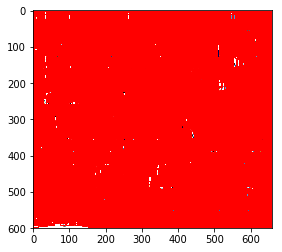

In [24]:
detect_feature(image_gray, template, 0.50)

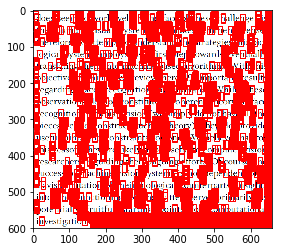

In [25]:
detect_feature(image_gray, template, 0.55)

I have used the convloution method below to find the template.

In [16]:
def threshold_conv(sub_img, template):
    return np.sum(np.multiply(sub_img, template)) / float(template.size)    

In [17]:
def detect_feature_conv(image_gray, template, limit):
    fig, ax = plt.subplots(1)
    max_thresh = 0.0
    image_height = image_gray.shape[0]
    image_width = image_gray.shape[1]
    template_height = template.shape[0]
    template_width = template.shape[1]
    for i in range(0, (image_height - template_height)):

        for j in range(0, (image_width - template_width)):

            sub_img = image_gray[i:template_height+i, j:template_width+j]
            threshold_val = threshold_conv(sub_img, template)
            if max_thresh < threshold_val:
                max_thresh = threshold_val
            if threshold_val > limit: #Adding a rectangle box
            #count += 1
                bottom_left_x = j
                bottom_left_y = i
                rectangle = patches.Rectangle((bottom_left_x,bottom_left_y), template_width, template_height, linewidth=1, edgecolor='r', facecolor='none')
                ax.add_patch(rectangle)
    print(threshold_val)
    ax.imshow(image)
    plt.show()

0.775919732441


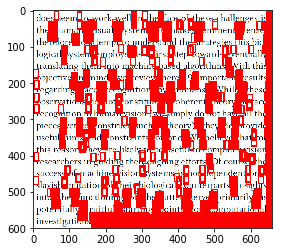

In [23]:
detect_feature_conv(image_gray, template, 0.77)

0.05064935064935065


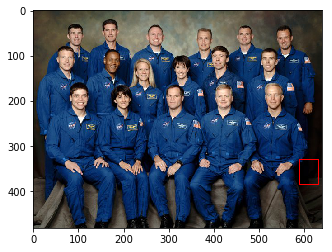

In [59]:
detect_feature(image_gray, template, 0.05)

0.05064935064935065


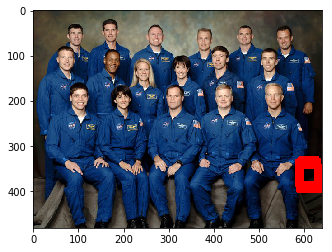

In [12]:
image = plt.imread('../face.jpg')
image_gray = image[:,:,0]
template = plt.imread('../sample_face.png')
template = template[:,:,0]
detect_feature(image_gray, template, 0.03)

17.1686248647


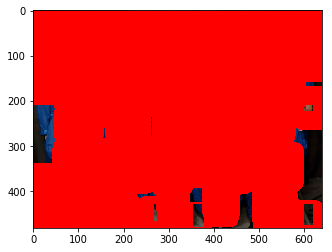

In [69]:
image = plt.imread('../face.jpg')
image_gray = image[:,:,0]
template = plt.imread('../sample_face.png')
template = template[:,:,0]
detect_feature_conv(image_gray, template, 17.16)
#print(template.shape)

Below I have used the Open cv implementation of template matching and was able to get a good matching of the template. You can use 6 methods in Open cv to match template, I have used all 6 and displayed the results.

(444, 218)


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


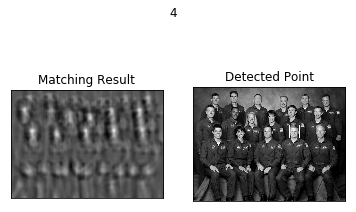

(444, 218)


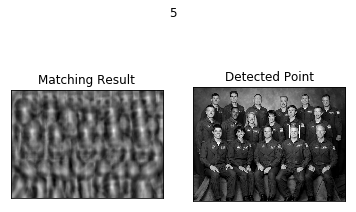

(444, 218)


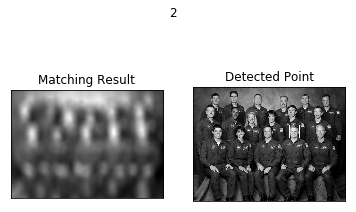

(444, 218)


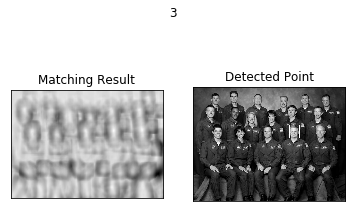

(444, 218)


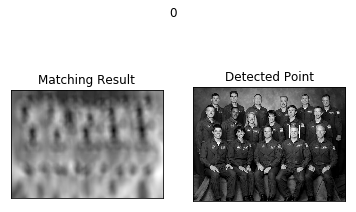

(444, 218)


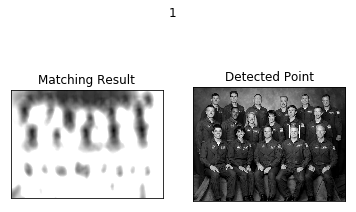

In [14]:
img = cv.imread('../face.jpg',0)
img2 = img.copy()
template = cv.imread('../sample_face.png',0)
w, h = template.shape[::-1]
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for method in methods:
    img = img2.copy()
    method = eval(method)
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print(bottom_right)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(method)
    plt.show()